In [27]:
import pandas as pd
import numpy as np
from IPython.display import * 
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.options.display.float_format = '{:,.2f}'.format

import seaborn as sns
import scipy as stats
import matplotlib as mpl
from matplotlib.pylab import plt
import importlib

In [28]:
import pandas as pd
base = 'https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/'
file_confirmed = base+'time_series_covid19_confirmed_global.csv'
print(file_confirmed)
covid = pd.read_html(file_confirmed)[0]
covid.head()

https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv


,0,1
0,nan,"Province/State,Country/Region,Lat,Long,1/22/20..."
1,nan,",Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,..."
2,nan,",Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0..."
3,nan,",Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,..."
4,nan,",Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,..."


## Transform the data into a dataframe with headers as dates

In [29]:
cols = covid.iloc[0,1].split(',')
df = pd.DataFrame(columns = cols)
for i in range(1,covid.shape[0]): 
    ddd = covid.iloc[i,1].split(',')
    df.loc[df.shape[0]] = ddd[0:len(cols)]
    
covid = df.copy(deep=True)


In [30]:
covid.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21
0,,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,65486,65728,66275,66903,67743,68366,69130,70111,70761,71838
1,,Albania,41.1533,20.1683,0,0,0,0,0,0,...,132176,132209,132215,132229,132244,132264,132285,132297,132309,132315
2,,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,126651,126860,127107,127361,127646,127926,128198,128456,128725,128913
3,,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,13569,13569,13569,13664,13671,13682,13693,13693,13693,13727
4,,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,32149,32441,32623,32933,33338,33607,33944,34180,34366,34551


## Select the US data

In [31]:

us = df[df['Country/Region']=='US'].copy(deep=True)
us.head()

cols = [col for col in us.columns if col[0].isdigit()]
cols[0:10]

us = us[cols].T
us.reset_index(inplace=True)
us.head()

us.columns = ['DATE', 'Total_Cases']
us.DATE = pd.to_datetime(us.DATE)
us.Total_Cases = us.Total_Cases.astype(float)


import math
maxcases = us.Total_Cases.max()
maxcases = math.ceil(maxcases/10**6)*10**6
us['WhichMillion'] = pd.cut(us.Total_Cases, bins = list(range(0, maxcases+1, 10**6)))
mills = us.WhichMillion.unique()

d = {}
for i in range(len(mills)):
    #print(mills[i])
    key = str(int(mills[i].right))
    delta = us[us.WhichMillion==mills[i]].DATE.max().date()- us[us.WhichMillion==mills[i]].DATE.min().date()
    delta = delta.days
    d[key] = [us[us.WhichMillion==mills[i]].DATE.min().date(), us[us.WhichMillion==mills[i]].DATE.max().date(),
             delta]
    
d

{'1000000': [datetime.date(2020, 1, 22), datetime.date(2020, 4, 26), 95],
 '2000000': [datetime.date(2020, 4, 27), datetime.date(2020, 6, 9), 43],
 '3000000': [datetime.date(2020, 6, 10), datetime.date(2020, 7, 6), 26],
 '4000000': [datetime.date(2020, 7, 7), datetime.date(2020, 7, 22), 15],
 '5000000': [datetime.date(2020, 7, 23), datetime.date(2020, 8, 7), 15],
 '6000000': [datetime.date(2020, 8, 8), datetime.date(2020, 8, 30), 22],
 '7000000': [datetime.date(2020, 8, 31), datetime.date(2020, 9, 24), 24],
 '8000000': [datetime.date(2020, 9, 25), datetime.date(2020, 10, 15), 20],
 '9000000': [datetime.date(2020, 10, 16), datetime.date(2020, 10, 29), 13],
 '10000000': [datetime.date(2020, 10, 30), datetime.date(2020, 11, 7), 8],
 '11000000': [datetime.date(2020, 11, 8), datetime.date(2020, 11, 13), 5],
 '12000000': [datetime.date(2020, 11, 14), datetime.date(2020, 11, 19), 5],
 '13000000': [datetime.date(2020, 11, 20), datetime.date(2020, 11, 25), 5],
 '14000000': [datetime.date(2020, 

## Creat the barchart below

In [34]:
import math
maxcases = us.Total_Cases.max()
maxcases = math.ceil(maxcases/10**6)*10**6
print(maxcases)
us['WhichMillion'] = pd.cut(us.Total_Cases, bins = list(range(0, maxcases+1, 10**6)))
mills = us.WhichMillion.unique()
print(mills)
d = {}
for i in range(len(mills)):
    print(mills[i])
    key = str(int(mills[i].right))
    delta = us[us.WhichMillion==mills[i]].DATE.max().date()- us[us.WhichMillion==mills[i]].DATE.min().date()
    delta = delta.days
    d[key] = [us[us.WhichMillion==mills[i]].DATE.min().date(), us[us.WhichMillion==mills[i]].DATE.max().date(),
             delta]
    
# d

34000000
[(0, 1000000], (1000000, 2000000], (2000000, 3000000], (3000000, 4000000], (4000000, 5000000], ..., (29000000, 30000000], (30000000, 31000000], (31000000, 32000000], (32000000, 33000000], (33000000, 34000000]]
Length: 34
Categories (34, interval[int64]): [(0, 1000000] < (1000000, 2000000] < (2000000, 3000000] < (3000000, 4000000] ... (30000000, 31000000] < (31000000, 32000000] < (32000000, 33000000] < (33000000, 34000000]]
(0, 1000000]
(1000000, 2000000]
(2000000, 3000000]
(3000000, 4000000]
(4000000, 5000000]
(5000000, 6000000]
(6000000, 7000000]
(7000000, 8000000]
(8000000, 9000000]
(9000000, 10000000]
(10000000, 11000000]
(11000000, 12000000]
(12000000, 13000000]
(13000000, 14000000]
(14000000, 15000000]
(15000000, 16000000]
(16000000, 17000000]
(17000000, 18000000]
(18000000, 19000000]
(19000000, 20000000]
(20000000, 21000000]
(21000000, 22000000]
(22000000, 23000000]
(23000000, 24000000]
(24000000, 25000000]
(25000000, 26000000]
(26000000, 27000000]
(27000000, 28000000]
(

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0


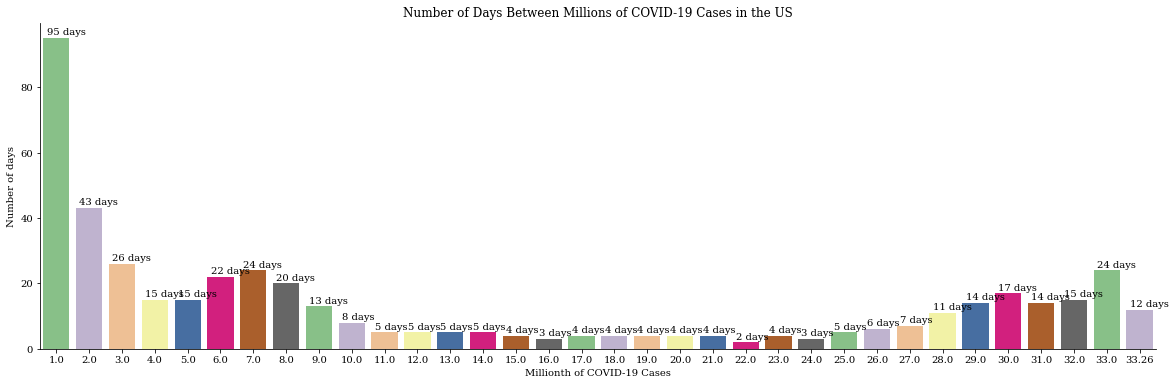

In [35]:
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Tahoma']
fig, ax = plt.subplots(1,1, figsize=(20, 6))

sns.barplot(x = [int(key)/10**6 for key in d.keys()], 
            y=[val[2] for val in d.values()], ax = ax, 
            palette='Accent', 
            #color='black'
           )
sns.despine()
for i in range(len(ax.get_xticklabels())):
    name = ax.get_xticklabels()[i].get_text()
    print(name)
    name = int(name.replace('.0', ''))
    name *=1000000
    name = str(name)
    days = d[name][2]
    val  = d[name][1]
    #print(name, days, val)
    ax.text(i-0.3, days+1, str(days)+' days')
    
corrected = [int(key)/10**6 for key in d.keys()]
corrected[-1] = round(us.Total_Cases.max()/10**6,2)
corrected
ax.set_xticklabels(corrected)

import datetime
dt = datetime.datetime.now().strftime('%Y_%m_%d')
plt.savefig('US_CASES_AsOf_{}.jpeg'.format(dt) )
plt.savefig('US_CASES_AsOf_{}.eps'.format(dt) )
plt.savefig('US_CASES_AsOf_{}.pdf'.format(dt) )

ax.set_ylabel('Number of days')
ax.set_xlabel('Millionth of COVID-19 Cases', fontdict={'family':'serif'})
ax.set_title('Number of Days Between Millions of COVID-19 Cases in the US')
plt.savefig('Millionth_cases_{}.jpeg'.format(dt) )

